In [22]:
import pickle
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

with open('dataset/filtered_df.pkl', 'rb') as f:
    df = pickle.load(f)  
df

,Employment_Status,Annual_Income,Credit_Score,Outstanding_Debt,Loan_Amount_Requested,Loan_Type,Loan_Approval_Status
0,Employed,139901,743,19822,24535,Secured,1
1,Employed,21162,468,18321,8288,Unsecured,0
4,Employed,81753,752,8780,23360,Unsecured,1
8,Self-Employed,121626,803,13940,20239,Secured,0
10,Self-Employed,54670,772,22104,20000,Unsecured,1
...,...,...,...,...,...,...,...
51986,Self-Employed,105630,734,14841,26616,Unsecured,1
51989,Unemployed,118085,714,9803,30183,Secured,0
51990,Self-Employed,134581,756,15172,24717,Unsecured,1
51992,Unemployed,34019,572,19031,8383,Unsecured,0


In [23]:
def calculate_cutoffs(data, column_name):
    """
    Calculates quantile-based cutoffs for a column in the data.
    
    Parameters:
    - data: The DataFrame containing the data.
    - column_name: The column name to base the cutoff calculations on.

    Returns:
    - A dictionary containing the low, medium, and high cutoffs.
    """
    return {
        "low_cutoff": data[column_name].quantile(0.5),
        "medium_start": data[column_name].quantile(0.25),
        "medium_middle": data[column_name].quantile(0.5),
        "medium_end": data[column_name].quantile(0.75),
        "max_data": data[column_name].max(),
    }


def membership_function(antecedent, cutoffs):
    """
    Sets up 'low', 'medium', and 'high' fuzzy membership functions using provided cutoffs.
    
    Parameters:
    - antecedent: The fuzzy antecedent to apply the memberships to.
    - cutoffs: A dictionary containing precomputed cutoff values.
    """
    # Define triangular membership functions
    antecedent['low'] = fuzz.trimf(antecedent.universe, [0, 0, cutoffs["low_cutoff"]])
    antecedent['medium'] = fuzz.trimf(antecedent.universe, [cutoffs["medium_start"], cutoffs["medium_middle"], cutoffs["medium_end"]])
    antecedent['high'] = fuzz.trimf(antecedent.universe, [cutoffs["medium_middle"], cutoffs["max_data"], cutoffs["max_data"]])


def get_fuzzy_sets(df):
    """
    Returns the fuzzy sets and their corresponding results for 'Annual_Income', 
    'Loan_Amount_Requested', 'Outstanding_Debt', and 'result' (loan category).

    Parameters:
    - df: The dataframe containing the data to base the fuzzy sets on.

    Returns:
    - annual_income, loan_amount_requested, outstanding_debt, result: The fuzzy sets and results.
    """

    # Calculate max values from the data
    max_loan = df['Loan_Amount_Requested'].max()

    # Create fuzzy sets for each column
    annual_income = ctrl.Antecedent(np.arange(0, df['Annual_Income'].max() + 1, 1000), 'Annual_Income')
    outstanding_debt = ctrl.Antecedent(np.arange(0, df['Outstanding_Debt'].max() + 1, 1000), 'Outstanding_Debt')
    credit_score = ctrl.Antecedent(np.arange(0, df['Credit_Score'].max() + 1, 1), 'Credit_Score')
    loan_amount_requested = ctrl.Consequent(np.arange(0, max_loan + 1, 1000), 'result')
    

    # Apply membership function
    membership_function(annual_income, calculate_cutoffs(df, "Annual_Income"))
    membership_function(loan_amount_requested, calculate_cutoffs(df, "Loan_Amount_Requested"))
    membership_function(outstanding_debt, calculate_cutoffs(df, "Outstanding_Debt"))

    credit_score['low'] = fuzz.trimf(credit_score.universe, [0, 335, 669])
    credit_score['medium'] = fuzz.trimf(credit_score.universe, [580, 690, 799])
    credit_score['high'] = fuzz.trimf(credit_score.universe, [670, 760, 850])

    # result['low'] = fuzz.trimf(result.universe, [0, 0, max_loan / 2])
    # result['medium'] = fuzz.trimf(result.universe, [0, max_loan / 2, max_loan])
    # result['high'] = fuzz.trimf(result.universe, [max_loan / 2, max_loan, max_loan])

    # Return all fuzzy sets and the result categories
    return annual_income, loan_amount_requested, outstanding_debt, credit_score

def print_fuzzy_object_details(fuzzy_object):
    """
    Prints the detailed contents of a fuzzy object (Antecedent or Consequent).
    
    Parameters:
    - fuzzy_object: The fuzzy object to inspect (Antecedent or Consequent).
    """
    print(f"Name: {fuzzy_object.label}")
    print("Universe:", fuzzy_object.universe)
    print("Membership Functions:")
    for term_name, membership_func in fuzzy_object.terms.items():
        print(f"  {term_name}: {membership_func.mf}")


# Example usage
annual_income, loan_amount_requested, outstanding_debt, credit_score = get_fuzzy_sets(df)

print("Details for Credit Score:")
print_fuzzy_object_details(credit_score)

Details for Credit Score:
Name: Credit_Score
Universe: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

In [24]:


# # Rule 1: Low income and low debt result in a low loan amount
# rule1 = ctrl.Rule(annual_income['low'] & outstanding_debt['low'], result['low'])

# # Rule 2: Medium income and low debt result in a medium loan amount
# rule2 = ctrl.Rule(annual_income['medium'] & outstanding_debt['low'], result['medium'])

# # Rule 3: High income and low debt result in a high loan amount
# rule3 = ctrl.Rule(annual_income['high'] & outstanding_debt['low'], result['high'])

# # Rule 4: Low income and medium debt result in a low loan amount
# rule4 = ctrl.Rule(annual_income['low'] & outstanding_debt['medium'], result['low'])

# # Rule 5: Medium income and medium debt result in a medium loan amount
# rule5 = ctrl.Rule(annual_income['medium'] & outstanding_debt['medium'], result['medium'])

# # Rule 6: High income and medium debt result in a high loan amount
# rule6 = ctrl.Rule(annual_income['high'] & outstanding_debt['medium'], result['high'])

# # Rule 7: Low income and high debt result in a low loan amount
# rule7 = ctrl.Rule(annual_income['low'] & outstanding_debt['high'], result['low'])

# # Rule 8: Medium income and high debt result in a medium loan amount
# rule8 = ctrl.Rule(annual_income['medium'] & outstanding_debt['high'], result['low'])

# # Rule 9: High income and high debt result in a high loan amount
# rule9 = ctrl.Rule(annual_income['high'] & outstanding_debt['high'], result['medium'])

# from itertools import product

# # Define the groups of words
# parenthesis_groups = [
#     ["employment_status_unemployed", "employment_status_selfemployed", "employment_status_employed"],
#     ["annual_income_low", "annual_income_medium", "annual_income_high"],
#     ["credit_score_low", "credit_score_medium", "credit_score_high"],
#     ["outstanding_debt_low", "outstanding_debt_medium", "outstanding_debt_high"],
#     ["loan_type_secured", "loan_type_unsecured"]
# ]

# # Find every combination of one word from each parenthesis
# combinations = list(product(*parenthesis_groups))

# # Print all combinations
# for combination in combinations:
#     print(combination)

# # Count total combinations for reference
# len(combinations)




In [25]:
# Function to calculate the categorical result for a single row based on the given rules
def calculate_categorical_result(row, annual_income, outstanding_debt, credit_score, loan_amount_requested):

    


    # Inputs from the dataset
    income = row['Annual_Income']
    debt = row['Outstanding_Debt']
    requested_amount = row['Loan_Amount_Requested']
    credit = row['Credit_Score']

    # Fuzzify inputs using existing membership functions
    income_low = fuzz.interp_membership(annual_income.universe, annual_income['low'].mf, income)
    income_medium = fuzz.interp_membership(annual_income.universe, annual_income['medium'].mf, income)
    income_high = fuzz.interp_membership(annual_income.universe, annual_income['high'].mf, income)
    
    debt_low = fuzz.interp_membership(outstanding_debt.universe, outstanding_debt['low'].mf, debt)
    debt_medium = fuzz.interp_membership(outstanding_debt.universe, outstanding_debt['medium'].mf, debt)
    debt_high = fuzz.interp_membership(outstanding_debt.universe, outstanding_debt['high'].mf, debt)

    credit_score_low = fuzz.interp_membership(credit_score.universe, credit_score['low'].mf, credit)
    credit_score_medium = fuzz.interp_membership(credit_score.universe, credit_score['medium'].mf, credit)
    credit_score_high = fuzz.interp_membership(credit_score.universe, credit_score['high'].mf, credit)

    # Fuzzify the requested amount
    requested_low = fuzz.interp_membership(loan_amount_requested.universe, loan_amount_requested['low'].mf, requested_amount)
    requested_medium = fuzz.interp_membership(loan_amount_requested.universe, loan_amount_requested['medium'].mf, requested_amount)
    requested_high = fuzz.interp_membership(loan_amount_requested.universe, loan_amount_requested['high'].mf, requested_amount)



    # Apply rules to calculate activation strength for each result
    rule_activations = {
    'low': np.fmax.reduce([
        np.fmin(income_low, np.fmin(credit_score_low, debt_high)),   # Rule 5
        
        np.fmin(income_medium, np.fmin(credit_score_low, debt_medium)), # Rule 9
        np.fmin(income_low, np.fmin(credit_score_medium, debt_high))   # Rule 7
    ]),
    'medium': np.fmax.reduce([
        np.fmin(income_high, np.fmin(credit_score_high, debt_high)), # Rule 2
        np.fmin(income_medium, np.fmin(credit_score_medium, debt_low)), # Rule 3
        np.fmin(income_medium, np.fmin(credit_score_high, debt_medium)), # Rule 6
        np.fmin(income_low, np.fmin(credit_score_high, debt_low)),    # Rule 8
        np.fmin(income_high, np.fmin(credit_score_low, debt_high)) # Rule 4
    ]),
    'high': np.fmax.reduce([
        np.fmin(income_high, np.fmin(credit_score_high, debt_low))   # Rule 1
    ])
}

    # Store membership levels in a dictionary
    membership_levels = {
        'low': requested_low,
        'medium': requested_medium,
        'high': requested_high
    }

    # Determine the result category with the highest activation strength
    result_category = max(rule_activations, key=rule_activations.get)

    # Determine the category with the highest membership level
    fuzzy_request_category = max(membership_levels, key=membership_levels.get)
    return fuzzy_request_category, result_category

# Apply the function and unpack the tuple into two separate columns
df[['Fuzzy_Request', 'Fuzzy_Loan_Eligibility']] = df.apply(
    lambda row: pd.Series(calculate_categorical_result(
        row, annual_income, outstanding_debt, credit_score, loan_amount_requested)), axis=1
)

# Display the dataset with fuzzy results
print(df.head())


   Employment_Status  Annual_Income  Credit_Score  Outstanding_Debt  \
0           Employed         139901           743             19822   
1           Employed          21162           468             18321   
4           Employed          81753           752              8780   
8      Self-Employed         121626           803             13940   
10     Self-Employed          54670           772             22104   

    Loan_Amount_Requested  Loan_Type  Loan_Approval_Status Fuzzy_Request  \
0                   24535    Secured                     1        medium   
1                    8288  Unsecured                     0           low   
4                   23360  Unsecured                     1        medium   
8                   20239    Secured                     0        medium   
10                  20000  Unsecured                     1        medium   

   Fuzzy_Loan_Eligibility  
0                  medium  
1                     low  
4                  medium  
8   

In [26]:
# calculating whether the applicant gets approved
def calculate_fuzzy_approval_status(row):
    """
    Calculates the Fuzzy Approval Status based on the Fuzzy Request and Fuzzy Loan Eligibility.
    
    Parameters:
    - row: A row of the DataFrame containing 'Fuzzy_Request' and 'Fuzzy_Loan_Eligibility'.
    
    Returns:
    - Approval status as 1 (approved) or 0 (not approved).
    """
    request = row['Fuzzy_Request']
    loan_eligibility = row['Fuzzy_Loan_Eligibility']
    
    if request == "low":
        return 1  # Approved
    elif loan_eligibility == "low" and request == "medium":
        return 0  # Not approved
    elif loan_eligibility == "low" and request == "high":
        return 0  # Not approved
    elif loan_eligibility == "medium" and request == "medium":
        return 1  # Approved
    elif loan_eligibility == "medium" and request == "high":
        return 1  # Approved
    elif loan_eligibility == "high":
        return 1  # Approved
    else:
        return 0  # Default to not approved for unhandled cases (optional safety net)

# # Apply the function to the DataFrame
# df['Fuzzy_Approval_Status'] = df.apply(calculate_fuzzy_approval_status, axis=1)

# # Display the updated DataFrame
# print(df.head())


Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.14      0.21      7554
           1       0.64      0.87      0.74     13365

    accuracy                           0.61     20919
   macro avg       0.51      0.51      0.47     20919
weighted avg       0.55      0.61      0.55     20919



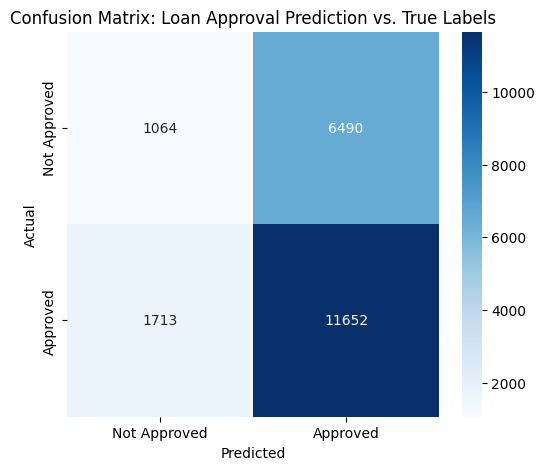

Accuracy: 60.79%


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



def compare_results(approval_status, true_labels):
    """
    Compares the fuzzy system's loan approval predictions with the actual true labels.
    
    Parameters:
    - approval_status: List of predicted loan approval statuses (Approved/Not Approved).
    - true_labels: List of true loan approval labels (Approved/Not Approved).
    
    Returns:
    - None: Displays accuracy and confusion matrix.
    """
    # Calculate the accuracy
    accuracy = accuracy_score(true_labels, approval_status)
    
    # Generate the confusion matrix with numeric labels
    cm = confusion_matrix(true_labels, approval_status)
    
    # Display the classification report
    print("Classification Report:\n", classification_report(true_labels, approval_status))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
    plt.title("Confusion Matrix: Loan Approval Prediction vs. True Labels")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Display accuracy
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Get the fuzzy sets from your fuzzification process (as done in your fuzzification file)
annual_income, loan_amount_requested, outstanding_debt, credit_score = get_fuzzy_sets(df)

# Apply the function to the DataFrame and pass fuzzy sets
df[['Fuzzy_Request', 'Fuzzy_Loan_Eligibility']] = df.apply(
    lambda row: pd.Series(calculate_categorical_result(
        row, annual_income, outstanding_debt, credit_score, loan_amount_requested)), axis=1
)

df['Fuzzy_Approval_Status'] = df.apply(calculate_fuzzy_approval_status, axis=1)




compare_results(df['Fuzzy_Approval_Status'], df['Loan_Approval_Status'])